In [14]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [15]:
#import each csv file
bumble_file = pd.read_csv('Resources\hbumble_google_play_reviews.csv')
hinge_file = pd.read_csv('Resources\hinge_google_play_reviews.csv')
okcupid_file = pd.read_csv('Resources\okcupid_google_play_reviews.csv')

In [16]:
#combine username and userimage to create a unique id
bumble_file['UniqueID'] = bumble_file['userName'] + bumble_file['userImage'] 
hinge_file['UniqueID'] = hinge_file['userName'] + hinge_file['userImage'] 
okcupid_file['UniqueID'] = okcupid_file['userName'] + okcupid_file['userImage'] 

In [17]:
# Create a filtered dataframe from specific columns
bumble_cols = ["userName", "userImage", "score", "thumbsUpCount", "at", "UniqueID"]
bumble_transformed= bumble_file[bumble_cols].copy()

# Rename the column headers
bumble_transformed = bumble_transformed.rename(columns={"UniqueID":"UniqueID",
                                                        "userName": "UserName", 
                                                        "userImage": "UserImage", 
                                                        "score": "Rating", 
                                                        "thumbsUpCount": "ThumpsUpCount", 
                                                        "at": "CreatedDate"})

# Clean the data by dropping duplicates and setting the index
bumble_transformed.drop_duplicates(subset = ["UniqueID"], inplace=True)
bumble_transformed.set_index(["UniqueID"], inplace=True)
bumble_transformed_df = bumble_transformed

bumble_transformed_df.to_csv('bumble_transformed_df.csv')

In [18]:
# Create a filtered dataframe from specific columns
hinge_cols = ["userName", "userImage", "score", "thumbsUpCount", "at", "UniqueID"]
hinge_transformed= hinge_file[bumble_cols].copy()

# Rename the column headers
hinge_transformed = hinge_transformed.rename(columns={"UniqueID":"UniqueID",
                                                        "userName": "UserName", 
                                                        "userImage": "UserImage", 
                                                        "score": "Rating", 
                                                        "thumbsUpCount": "ThumpsUpCount", 
                                                        "at": "CreatedDate"})

# Clean the data by dropping duplicates and setting the index
hinge_transformed.drop_duplicates(subset = ["UniqueID"], inplace=True)
hinge_transformed.set_index(["UniqueID"], inplace=True)

hinge_transformed_df = hinge_transformed

hinge_transformed_df.to_csv('hinge_transformed_df.csv')

In [20]:
# Create a filtered dataframe from specific columns
okcupid_cols = ["userName", "userImage", "score", "thumbsUpCount", "at", "UniqueID"]
okcupid_transformed= okcupid_file[bumble_cols].copy()

# Rename the column headers
okcupid_transformed = okcupid_transformed.rename(columns={"UniqueID":"UniqueID",
                                                        "userName": "UserName", 
                                                        "userImage": "UserImage", 
                                                        "score": "Rating", 
                                                        "thumbsUpCount": "ThumpsUpCount", 
                                                        "at": "CreatedDate"})

# Clean the data by dropping duplicates and setting the index
okcupid_transformed.drop_duplicates(subset = ["UniqueID"], inplace=True)
okcupid_transformed.set_index(["UniqueID"], inplace=True)

okcupid_transformed_df = okcupid_transformed

okcupid_transformed_df.to_csv('okcupid_transformed_df.csv')

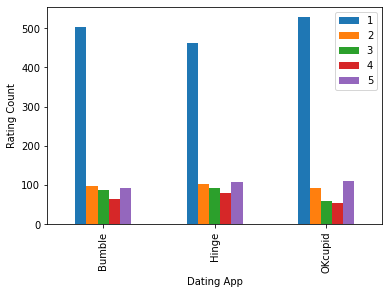

In [21]:
bumble_df = pd.read_csv('bumble_transformed_df.csv')
hinge_df = pd.read_csv('hinge_transformed_df.csv')
okcupid_df = pd.read_csv('okcupid_transformed_df.csv')

okcupid_df= okcupid_df.rename(columns={'Rating':'okcupid rating'})
bumble_df= bumble_df.rename(columns={'Rating':'bumble rating'})
hinge_df= hinge_df.rename(columns={'Rating':'hinge rating'})

dating_df =  pd.merge(bumble_df, hinge_df,
                                  how='inner', on=('UniqueID'))

dating_all_df= pd.merge(dating_df, okcupid_df, how= 'inner', on=('UniqueID'))


dating_ratings= dating_all_df[['bumble rating', 'hinge rating', 'okcupid rating']]
dating_ratings


dating_dist= pd.DataFrame({'Bumble':dating_ratings['bumble rating']. value_counts(),
'Hinge':dating_ratings['hinge rating']. value_counts(),
'OKcupid':dating_ratings['okcupid rating']. value_counts()})

dating_dist


dating_dist.T.plot(kind='bar',xlabel='Dating App',
ylabel='Rating Count')
plt.savefig("Distribution.png")

In [22]:
# connection_string = 'postgres:admin@localhost:5432/Databases'
# engine = create_engine(f'postgresql://{connection_string}')

rds_connection_string = "postgres:admin@localhost:5432/Project2"
engine = create_engine(f'postgresql://{rds_connection_string}')


In [23]:
engine.connect()

In [24]:
#load the dataframes into sql
bumble_transformed_df.to_sql(name='premise', con=engine, if_exists='append', index=True)
hinge_transformed_df.to_sql(name='premise', con=engine, if_exists='append', index=True)
okcupid_transformed_df.to_sql(name='premise', con=engine, if_exists='append', index=True)